In [59]:
# std
import os
import sys
import re

# 3rd party
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [60]:
def get_path(filename, dirname=None):
    root = os.path.dirname(os.getcwd())
    path = os.path.join(root, dirname, filename) if dirname else os.path.join(root, filename)

    return path

In [75]:
path = get_path('rntn_train_validate_and_test_wordnet.csv', 'results')
path

'/Users/luyolomagangane/workspace/deep-knowledge-modelling/results/rntn_train_validate_and_test_wordnet.csv'

In [76]:
results = pd.read_csv(path)
results.head()

,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_experiment,cost_validation_experiment,cost_test_experiment
0,150237.140625,7878.121094,31809.474609,2113.146729,4979.330078,20205.656250
1,134341.593750,7802.993164,31494.505859,1341.437378,8379.241211,33910.527344
2,124111.351562,7742.378418,31240.869141,995.285461,7257.853516,29306.863281
3,117083.093750,7698.704102,31055.728516,944.283264,5706.655273,22706.216797
4,111444.000000,7660.360840,30888.564453,865.563354,5906.799805,23574.556641


In [77]:
results = results.reset_index()
results.head()

,index,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_experiment,cost_validation_experiment,cost_test_experiment
0,0,150237.140625,7878.121094,31809.474609,2113.146729,4979.330078,20205.656250
1,1,134341.593750,7802.993164,31494.505859,1341.437378,8379.241211,33910.527344
2,2,124111.351562,7742.378418,31240.869141,995.285461,7257.853516,29306.863281
3,3,117083.093750,7698.704102,31055.728516,944.283264,5706.655273,22706.216797
4,4,111444.000000,7660.360840,30888.564453,865.563354,5906.799805,23574.556641


In [78]:
results = results_baseline.rename(columns={'index': 'epoch'})
results.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_experiment,cost_validation_experiment,cost_test_experiment
0,0,150237.140625,7878.121094,31809.474609,2113.146729,4979.330078,20205.656250
1,1,134341.593750,7802.993164,31494.505859,1341.437378,8379.241211,33910.527344
2,2,124111.351562,7742.378418,31240.869141,995.285461,7257.853516,29306.863281
3,3,117083.093750,7698.704102,31055.728516,944.283264,5706.655273,22706.216797
4,4,111444.000000,7660.360840,30888.564453,865.563354,5906.799805,23574.556641


In [79]:
results['epoch'] += 1
results.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_experiment,cost_validation_experiment,cost_test_experiment
0,1,150237.140625,7878.121094,31809.474609,2113.146729,4979.330078,20205.656250
1,2,134341.593750,7802.993164,31494.505859,1341.437378,8379.241211,33910.527344
2,3,124111.351562,7742.378418,31240.869141,995.285461,7257.853516,29306.863281
3,4,117083.093750,7698.704102,31055.728516,944.283264,5706.655273,22706.216797
4,5,111444.000000,7660.360840,30888.564453,865.563354,5906.799805,23574.556641


In [80]:
results = results.drop(['cost_test_baseline', 'cost_test_experiment'], axis=1)
results.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_training_experiment,cost_validation_experiment
0,1,150237.140625,7878.121094,2113.146729,4979.330078
1,2,134341.593750,7802.993164,1341.437378,8379.241211
2,3,124111.351562,7742.378418,995.285461,7257.853516
3,4,117083.093750,7698.704102,944.283264,5706.655273
4,5,111444.000000,7660.360840,865.563354,5906.799805


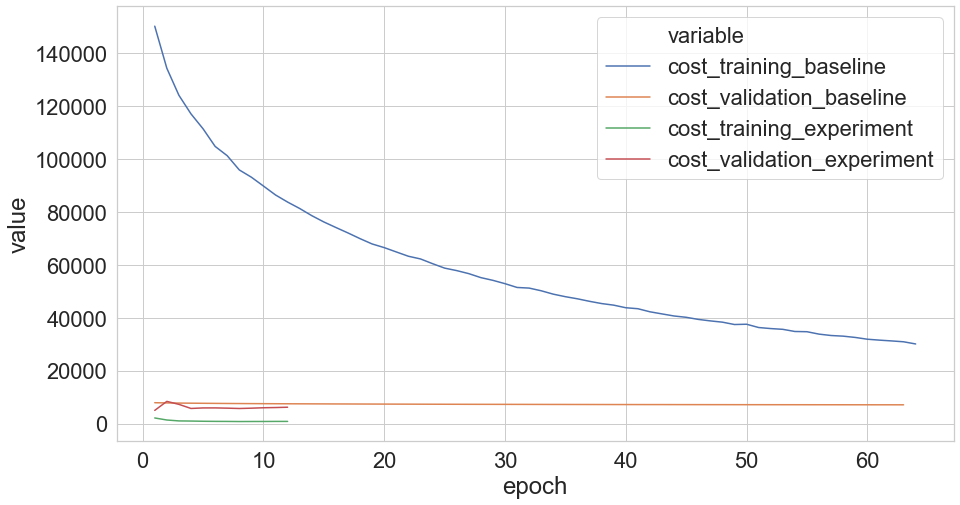

In [81]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results, ['epoch']))